# M508 Big Data Analytics - NLP Pipeline for Sentiment Analysis and Topic Modelling on the dataset that has Customer reviews of an e-commerce women's clothing.

Name: Umamaheswari Nagalingam

Student ID : GH1029248

About the dataset:
Dataset URL : https://www.kaggle.com/datasets/mexwell/womens-e-commerce-clothing-reviews

Business Problem:

The customer reviews for women's e-commerce cloting has to be analyzed to gain insights about the customer satisfaction, and to improve the overall shopping experience. In order to identify the strengths and weaknesses in the products and services offered, understanding customer feedback is very important. By this, we can build better strategies and take better business decisions.

This could benefit the company is some of the following aspects:

1. Based on customer feedback and preference, product offerings can be enhanced.
2. Customer satisfaction can be improved.
3. More targeted marketing and promotional strategies can be applied.


NLP Task Formulation:

This problem can be formulated as sentiment analysis task, which is basically to classify the customer reviews into positive, negative or neutral statements. Also, topic related reviews can also be segregated to better understand the customer opinions. This can be done by Topic modelling.

System Design:

Components of the System:
Data Preprocessing -> Text Vectorization -> Sentiment Analysis model -> Topic modelling -> Evaluation -> Visualization and reporting.

# Input Data

Importing the necessary libraries that are required to perform data manipulation, text processing, machine learning and visualization. The data containing the customer reviews of women's clothing from an e-commerce platform is then loaded and explored a bit for understanding its structure.

In [1]:
# Importing the libraries  that'll be made use in the pipeline
import pandas as pd
import numpy as np
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Loading the dataset and viewing first few rows to get an idea about it
file_path = '/content/drive/MyDrive/Women_s_E-Commerce_Clothing_Reviews_1594_1.csv'
data = pd.read_csv(file_path, delimiter=';')
print(data.head())

   Unnamed: 0  Clothing.ID  Age                    Title  \
0           1          767   33                      NaN   
1           2         1080   34                      NaN   
2           3         1077   60  Some major design flaws   
3           4         1049   50         My favorite buy!   
4           5          847   47         Flattering shirt   

                                         Review.Text  Rating  Recommended.IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive.Feedback.Count   Division.Name Department.Name Class.Name  
0                        0       Initmates        Intimate  Intimates  
1       

# Data Preprocessing

Here, we are converting the text data from Review.Text column into strings to ensure consistency. The review text is now being cleaned and normalized with a text preprocessing function. It involves converting the text to lowercase, removal of punctuation marks if any, stripping off white spaces, and removing extra white spaces, etc.

We're creating a new column called Processed_Review_Text to store the processed text, and are going to display the first few rows to verify this preprocessing.

In [2]:
# Data Preprocessing
# Converting all entries in the Review.Text column to strings
data['Review.Text'] = data['Review.Text'].astype(str)

# Normalizing text
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    tokens = text.split()
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Applying preprocessing to the Review.Text column
data['Processed_Review_Text'] = data['Review.Text'].apply(preprocess_text)

# Checking if the Processed_Review_Text column is created correctly
print(data.columns)
print(data[['Review.Text', 'Processed_Review_Text']].head())

Index(['Unnamed: 0', 'Clothing.ID', 'Age', 'Title', 'Review.Text', 'Rating',
       'Recommended.IND', 'Positive.Feedback.Count', 'Division.Name',
       'Department.Name', 'Class.Name', 'Processed_Review_Text'],
      dtype='object')
                                         Review.Text  \
0  Absolutely wonderful - silky and sexy and comf...   
1  Love this dress!  it's sooo pretty.  i happene...   
2  I had such high hopes for this dress and reall...   
3  I love, love, love this jumpsuit. it's fun, fl...   
4  This shirt is very flattering to all due to th...   

                               Processed_Review_Text  
0        absolutely wonderful silky sexy comfortable  
1  love dress sooo pretty happened store im glad ...  
2  high hopes dress really wanted work initially ...  
3  love love love jumpsuit fun flirty fabulous ti...  
4  shirt flattering adjustable tie perfect length...  


# Text Vectorization

Here, we are converting the processed text into numerical feature vectors using the TF-IDF(Term Frequency-Inverse Document Frequency) vectorizer. Basically the newly created column is transformed into a matrix, which is then converted into a DataFrame for better readability.

In [3]:
# Text Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X = tfidf_vectorizer.fit_transform(data['Processed_Review_Text'])
tfidf_df = pd.DataFrame(X.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Displaying the first few rows of the TF-IDF DataFrame
print(tfidf_df.head())

    aa   ab  abdomen  ability  able  absolute  absolutely  abstract  abt  \
0  0.0  0.0      0.0      0.0   0.0       0.0    0.384864       0.0  0.0   
1  0.0  0.0      0.0      0.0   0.0       0.0    0.000000       0.0  0.0   
2  0.0  0.0      0.0      0.0   0.0       0.0    0.000000       0.0  0.0   
3  0.0  0.0      0.0      0.0   0.0       0.0    0.000000       0.0  0.0   
4  0.0  0.0      0.0      0.0   0.0       0.0    0.000000       0.0  0.0   

   abundance  ...  zero       zip  zipped    zipper  zippered  zippers  \
0        0.0  ...   0.0  0.000000     0.0  0.000000       0.0      0.0   
1        0.0  ...   0.0  0.000000     0.0  0.000000       0.0      0.0   
2        0.0  ...   0.0  0.153044     0.0  0.134803       0.0      0.0   
3        0.0  ...   0.0  0.000000     0.0  0.000000       0.0      0.0   
4        0.0  ...   0.0  0.000000     0.0  0.000000       0.0      0.0   

   zipping  zips  zone  zoom  
0      0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0  
2    

# Sentiment Analysis Model

In this step, based on the "Rating" column, a new target variable - "Sentiment" is created. Ratings of 4 or 5 are considered positive (label 1) and others are considered negative (label 0).

Training and test data are being split to evaluate the model's performance, a Logistic regression is initialized and trained on the training data.

Following this, predictions are made on the test data and various evaluation metrics including accuracy, precision, recall and F1-score are calculated and displayed to assess the model's performance.

In [4]:
# Sentiment Analysis Model
data['Sentiment'] = data['Rating'].apply(lambda x: 1 if x >= 4 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['Sentiment'], test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

# Training the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8682418050234142
Precision: 0.8769230769230769
Recall: 0.9636917960088692
F1 Score: 0.9182622474580747


### Evaluation of Sentiment Analysis Model

The achieved accuracy of the model is approx. 86.82%, which indicates that the sentiment of the customer reviews has been classified correctly for most of the times.

The precision score is 87.69% which implies that the model is good in avoiding false positives.

Recall is 96.37% which indicates that the model is capablr to capture nearly all true positive cases.

F1 score is 91.83% balances precision and recall, this demonstrates the overall effectiveness and reliability of the sentiment analusis model.

**What can be implied into business?**

* Customer Satisfaction: The model's high accuracy and recall shows that the positive and negative customer sentiments can be identified by it, by which we gain insights into customer satisfaction levels product/service wise.

* Service Improvement: Having identified the negative comments, improvement ideas and steps can be taken to improve the service quality.

* Product development and marketing strategies: Popular products can be identified with the sentiment analysis, and focus can be turned towards the products/Services that needs development. Areas that has more positive results, can be targeted for marketing.

# Topic Modelling

Topic modelling on the TF-IDF matrix is performed by using the Latent Dirichlet Allocation (LDA) - To discover any hidden topics within the reviews.

The top words for each topic are extracted and displayed to help interpret and label the topics.

In [5]:
# Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit the LDA model
lda.fit(X)

# Getting the top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

# Printing the top words
tf_feature_names = tfidf_vectorizer.get_feature_names_out()
print_top_words(lda, tf_feature_names, 10)

Topic #0:
nan lounging hte socks robe definite sleeping jsut ask overalls
Topic #1:
love great dress wear jeans perfect comfortable fit size soft
Topic #2:
color beautiful love sweater dress great like fabric colors shirt
Topic #3:
dress size like fit im just fabric small love little
Topic #4:
size love small like wear dress ordered fit im just



### Evaluation of Topic modelling

We could see that the LDA model identified five topics:

Topic #0: Focus on comfort and leisurewear like robes, socks, and overalls.

Topic #1: Positive reviews of dresses and jeans, emphasizing comfort and perfect fit.

Topic #2: Aesthetic qualities of clothing, highlighting beautiful colors and fabrics.

Topic #3: Issues with dress sizes and fabric quality, mixing satisfaction and dissatisfaction.

Topic #4: Sizing and fit concerns, especially for smaller sizes, with ordering experiences.


All of these topics, in one way or other implies towards product development. These topics can be considered as more specific opinions about the products, which can definitely be used towards business development.

# Visualization and Reporting

The dataset is visualized to see the distribution of sentiments among it using a bar plot so that we can understand the overall sentiment trend in the reviews.

The distribution of topics identified by the LDA model is visualized using a histogram. By this, the prevalance of each topic within the reviews can be seen.

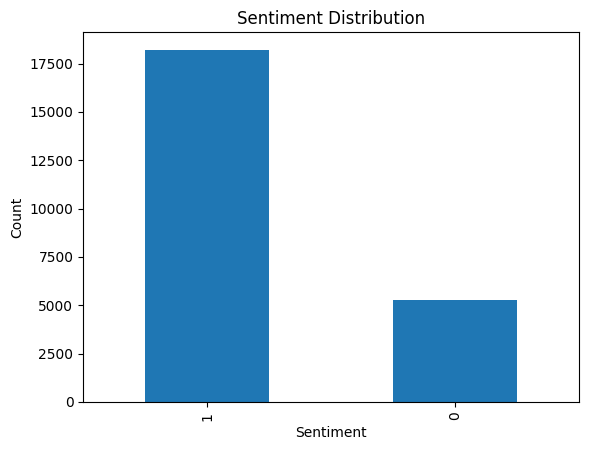

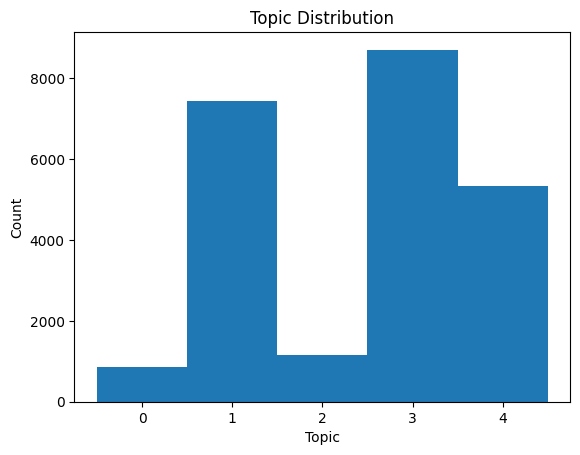

In [6]:
# Visualization and Reporting
# Plot sentiment distribution
data['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Plot the distribution of topics
topic_distribution = lda.transform(X)
topic_counts = topic_distribution.argmax(axis=1)

plt.hist(topic_counts, bins=range(lda.n_components + 1), align='left')
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()


# Final Discussion

Strengths and Limitations:

Strengths: Customer Sentiments can be identified so as to make improvements towards negative and keeping up the good work towards positive sentiments can be achieved.

Limitations: Eventhough the accuracy is high, there is still room for improvement. Hence, to land in deeper insights, a better model could be developed.


Recommendations:

* Sentiment Analysis can be made use to address customer concerns.

* Topic modelling insights can be made use for product development and marketing strategies.